# **Churn Analyis - EDA**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Load Data file**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

**Top 5 Row of Dataset (for look Dataset features and values)**

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check Shape**

In [5]:
df.shape

(7043, 21)

**Check Columns**

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Check Datatypes of all columns**

In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Check the descriptive statistics of numeric variables**

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000




*   SeniorCitizen is Categorical variable beacuse its 25% , 50% , 75% distribution is not proper.(all row have values so count is 7043 , min value is 0 ->not SeniorCitizen and max alue is 1 -> SeniorCitizon )
*   Tenure is Skewed , many customer leaves early and some are loyal (min	0 -> Some customers are new, max 72 -> others stayed full 6 years , 25% of customers stayed ≤ 9 months , Half of customers stayed ≤ 29 months , 75% stayed ≤ 55 months)
*   Monthly charges is wide range of pricing , std : 30 ->wide spread in monthly charges  , min: 18.25 and max: 118.75	Prices range from very low to very high.




**Check count of churn/non chrun**

In [9]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**Find Percentage of churn/non churn**

In [10]:
( 100* df['Churn'].value_counts()) /len(df['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


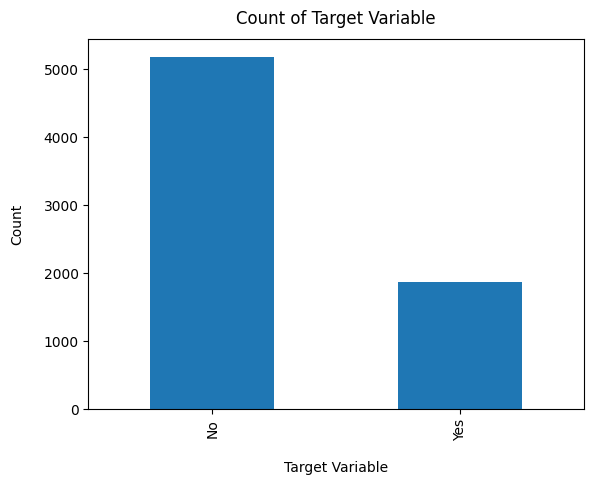

In [11]:
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Target Variable" , labelpad=14) # move Traget Variable lable 14 pt away from x-aixs (labelpad : add extra spacing between axis-lables and axis-ticks)
plt.ylabel("Count",labelpad=14)
plt.title("Count of Target Variable" , y=1.02 ) #y=1.02 pushes title bit above from plot area
plt.show()



*   Data is highly imbalanced (non churnes: churners -> 73:27)
*   in Classification problem ,
*   Model trained by Balanced Data will work efficiently because it trained in nearly equal amount of both class data records.
*   But Model trained by ImBalanced Data may be Overfit.(Model give high accuracy with Training data but low accuray with Test data)



**Ways to Balance Imbalanced Data**:
1. Resampling Techniques
*  Oversampling	: Duplicate samples from the minority class to balance the dataset
*  Undersampling : 	Remove samples from the majority class
*  SMOTE (Synthetic Minority Over-sampling Technique)	Generate synthetic examples for minority class using k-NN

2. Class Weights in Models
*  Let the model give more importance to the minority class by setting class_weight='balanced'.

*  Example in LogisticRegression:

* from sklearn.linear_model import LogisticRegression
* model = LogisticRegression(class_weight='balanced')

3.Ensemble Methods That Handle Imbalance
 * Use algorithms like: BalancedRandomForestClassifier

**Concise Summary of the data**

In [12]:
# as we have too many columns, we are using the verbose = True mode
# (because Pandas verbose default is false , it Hides column details if too many columns)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Percentage of Missing values**

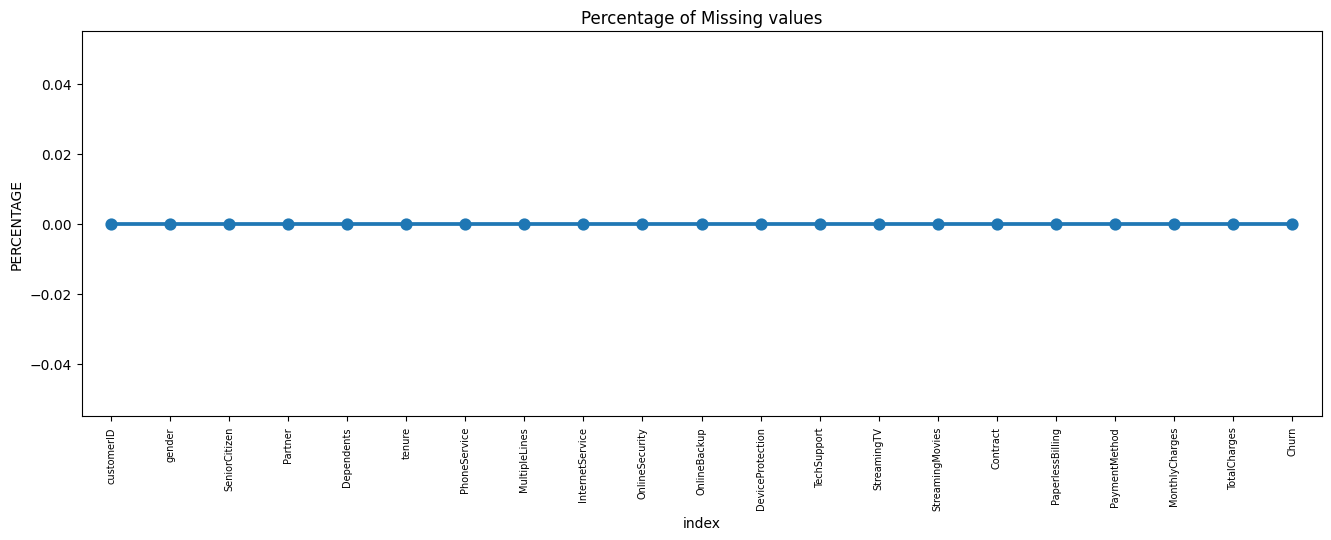

In [13]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Missing Data Handling**

* In this dataset, there are no missing values

General Thumb Rules:

* Low percentage of missing values :


1.   Fill the missing values using the mean, median, or mode,
2.   use regression techniques to predict them.

* High percentage of missing values :

(may drop the column if:)

1.  it contains more than 30–40% missing data.
2.  And the column doesn't give more insights.



but in this case , If Is_Car has 60% 'No', then Car_Type will naturally have 60% nulls. These are not missing but not applicable. So, don’t drop columns blindly based on missing percentage — understand the context first.

make decision wisely by undersanding importance of features

# **Data Cleaning**

Beacuse in this dataset , ex: TotalCharges column type is Object so we can't say is there is Null value or not , so convert non-numerical feature to numerical

1.**Create a copy of base data for manupulation & processing**

In [14]:
df2=df.copy()

2. **Total Charges should be numeric amount. Let's convert it to numerical data type**

In [15]:
df2.TotalCharges = pd.to_numeric(df2.TotalCharges, errors='coerce') #If any value can't be converted like a blank string '', it will become NaN
 #(errors='coerce' force invalid entries to NaN).
df2.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


3. **As we can see there are 11 missing values in TotalCharges column. Let's check these records**

In [16]:
df2.loc[df2 ['TotalCharges'].isnull() == True]

#df2['TotalCharges'].isnull() == True
#Finds rows where TotalCharges is missing (NaN)

#.loc[ ... ]:
#Returns all rows from df2 where that condition is True

#It filters the DataFrame to show only the rows where TotalCharges is missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. **Missing Value Treatement**

* Since the % of these records compared to total dataset is very low 0.15%, [(11*100 / 7000) ~0.15% ]
* it is safe to ignore them from further processing.





In [17]:
#Removing missing values
df2.dropna(how = 'any', inplace = True)



In [18]:
#dropna() : removes rows with any missing values (NaN)
#how='any' : If any column in a row has a missing value → drop that row
#inplace=True : Apply the change directly to df2  (no need to assign it back)

#df2.fillna(0)
#fillna(0) replaces all missing values in the DataFrame with 0

5. **Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...**

In [19]:
# Get the max tenure
print(df2['tenure'].max())

72


In [20]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

#range(1, 72, 12) → generates numbers: 1, 13, 25, 37, 49, 61
#For each i, it formats a string: "i - i+11"


df2['tenure_group'] = pd.cut(df2.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
#pandas.cut() function:
#df2.tenure: the data to bin.
#range(1, 80, 12): the bin edges: [1, 13, 25, 37, 49, 61, 73]
#right=False: left-inclusive, right-exclusive. Example: 1 ≤ x < 13
#labels=labels: assigns the custom labels ('1 - 12', etc.) to each bin

#It returns a new column where each customer’s tenure is grouped into a range.

In [22]:
df2.shape

(7032, 22)

In [23]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

In [24]:
df2['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


6. **Remove columns not required for processing**

In [25]:
#drop column customerID and tenure
#bcoz customerID not play role for churn prediction and we have tenure group so no longer need of tenure column

df2.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# **Data Exploration**

1. **Plot distibution of individual predictors by churn**

Univariate Analysis

In [26]:
#df2.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])
# Removes these three columns temporarily(drop() return new dataframe with removed column , not modify df2 ) from the DataFrame df2
# drop() doesn't change the original DataFrame unless you specify inplace=True.

#enumerate() helps you access both the index and the value in the loop.
# bcoz churn is target and totalchargers and montly charges are continues value so not good for countplot

#for i, predictor in enumerate(...) : Loops over all remaining column names (categorical predictors)
#i is the index, predictor is the column name

# sns.countplot(data=df2, x=predictor, hue='Churn')
# x=predictor: X-axis shows the categories of that column
# hue='Churn': Bars are split by the Churn values (Yes/No) → helps visualize the effect of that variable on churn

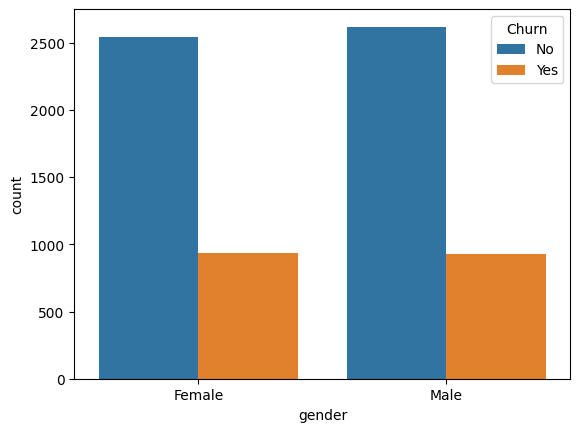

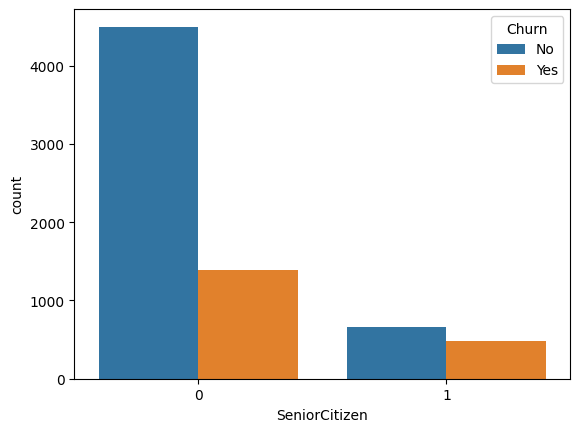

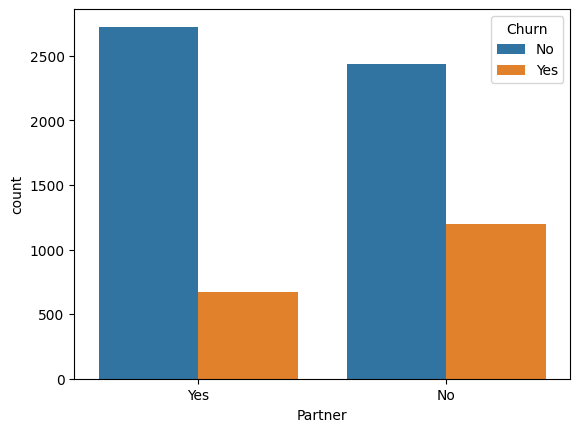

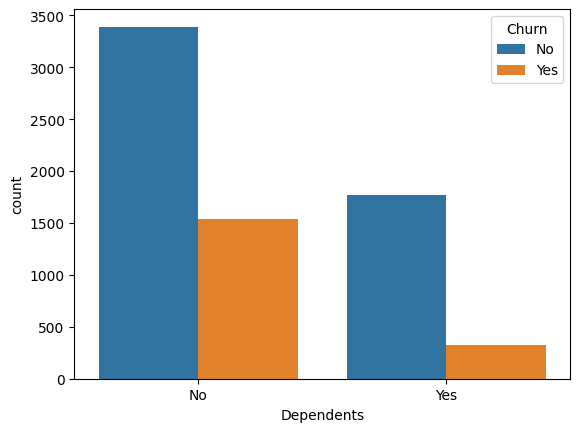

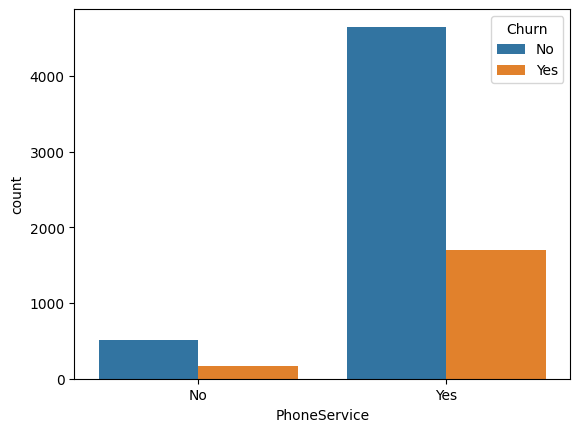

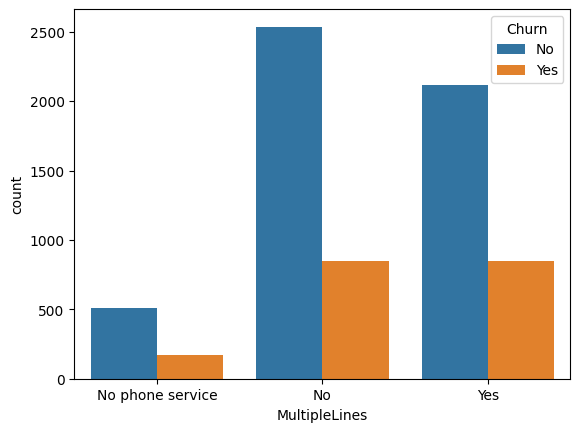

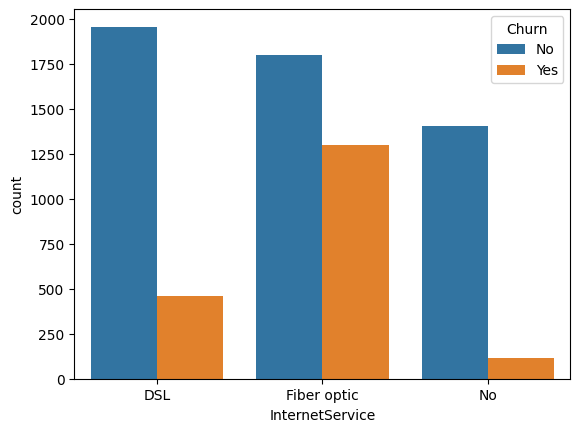

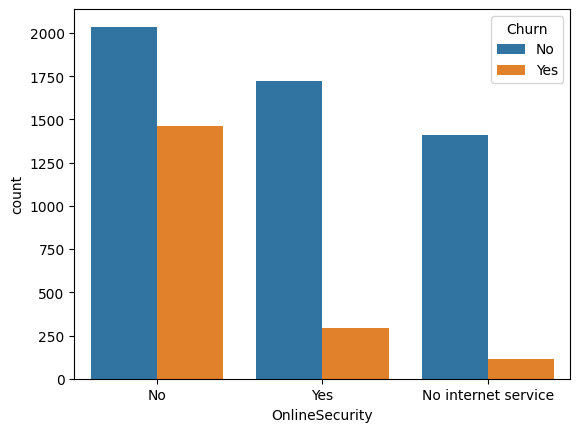

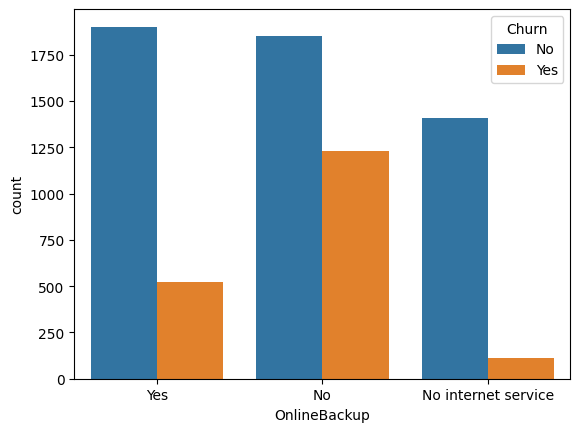

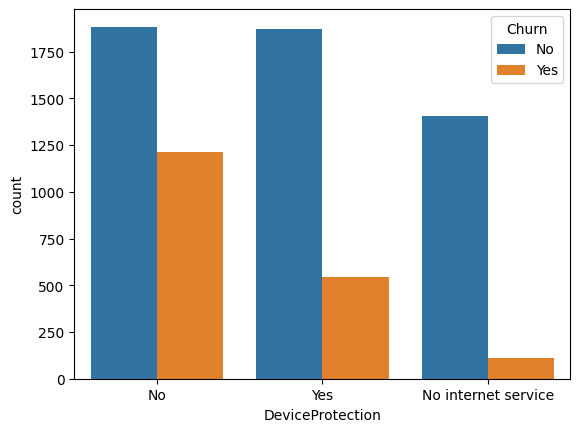

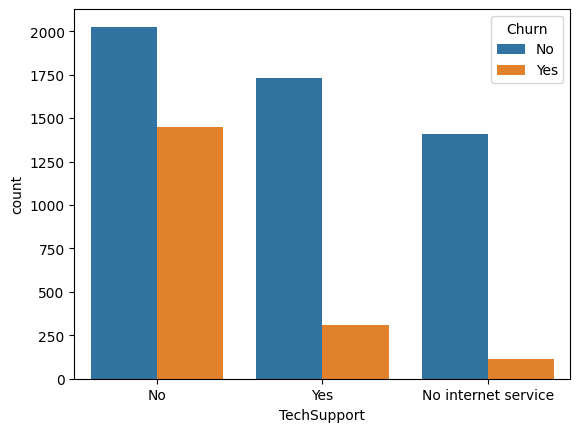

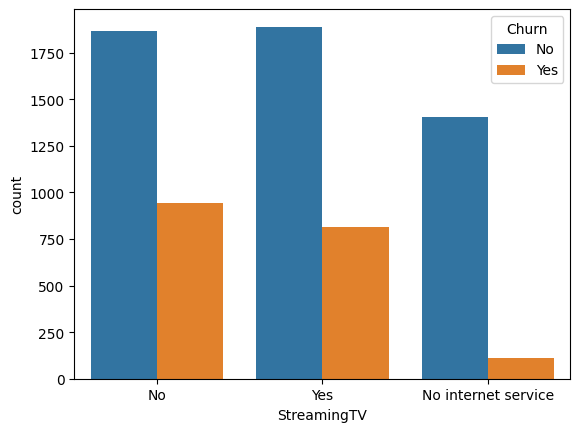

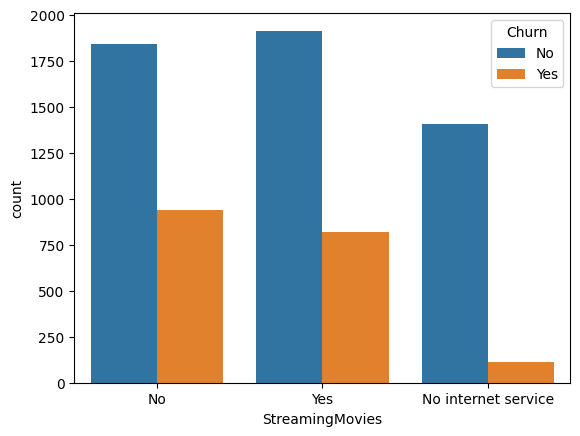

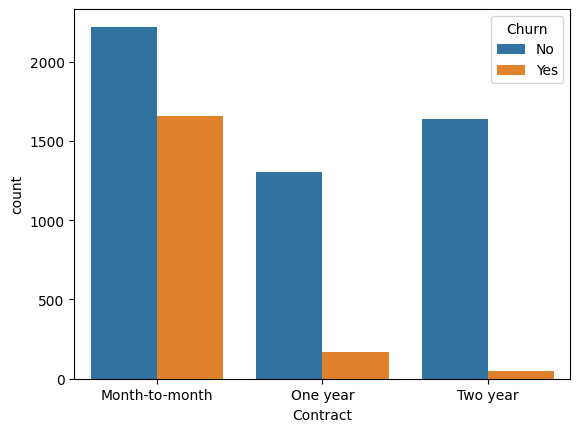

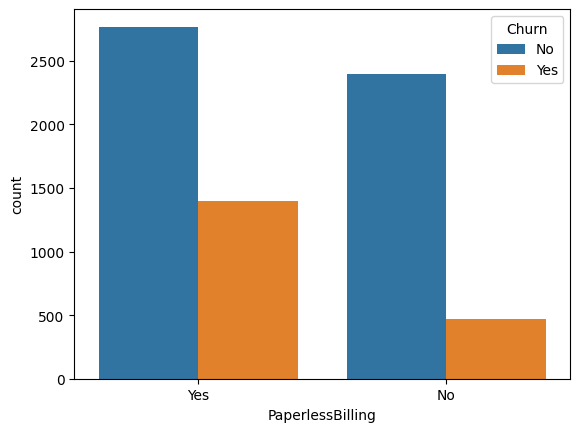

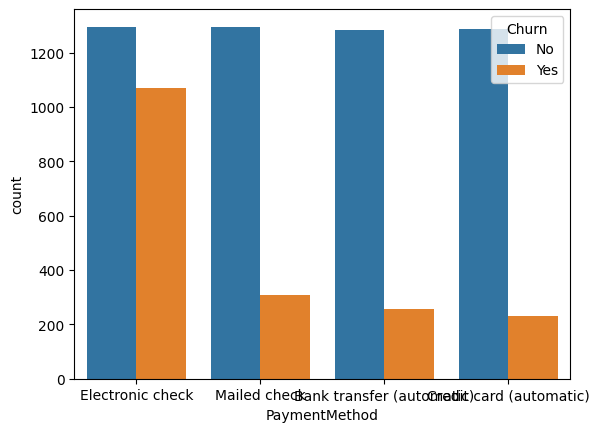

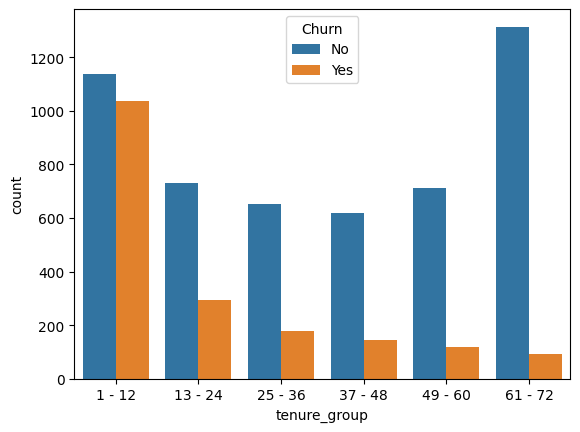

In [27]:
for i, predictor in enumerate(df2.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df2, x=predictor, hue='Churn')

2. **Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0**

In [28]:
df2['Churn'] = np.where(df2.Churn == 'Yes',1,0)

In [29]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. **Convert all the categorical variables into dummy variables**

In [30]:
# Automatically detects categorical columns  ,Replaces them with multiple binary (0 or 1) columns — one for each category.

# A column like Contract with values: Month-to-month, One year, Two yearWill become:
# Contract_Month-to-month | Contract_One year | Contract_Two year

In [31]:
df2_dummies = pd.get_dummies(df2)
df2_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [32]:
# One-hot encoding is a data preprocessing technique used to convert categorical data into a numerical format that machine learning models can understand

In [33]:
# We use get_dummies() to convert categorical data into numerical format using One-Hot Encoding, because ML models work only with numbers.
# It creates separate columns for each category with 0s and 1s, avoiding confusion from Label Encoding.

4. **Relationship between Monthly Charges and Total Charges**

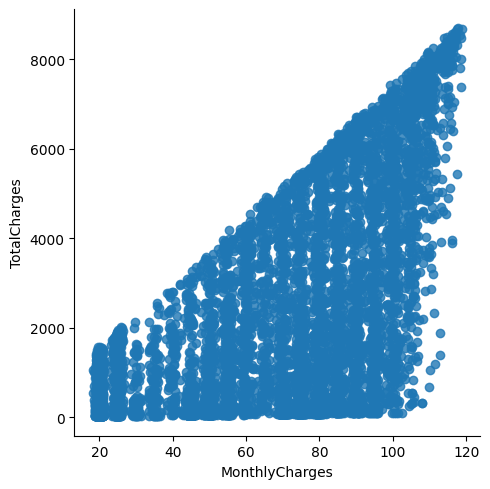

In [34]:
sns.lmplot(data=df2_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase

5. **Churn by Monthly Charges and Total Charges**

What is a KDE Plot?
A KDE (Kernel Density Estimate) plot is a smooth curve that shows the probability distribution of a continuous variable.

Imagine you have a histogram (bar graph) of data like "Monthly Charges" or "Total Charges".
A KDE plot does the same thing, but instead of bars, it draws a smooth curved line that shows where the values are concentrated.



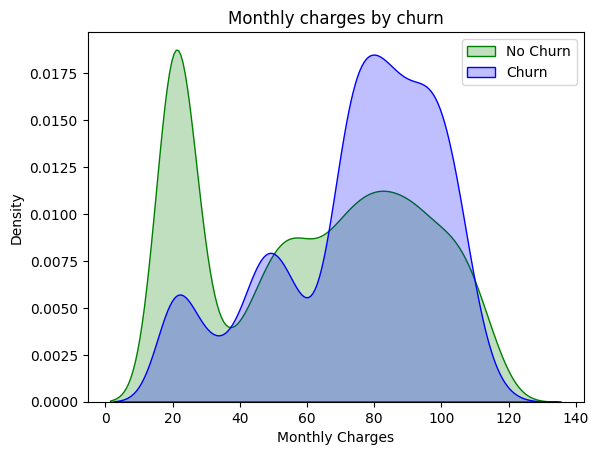

In [35]:
Mth = sns.kdeplot(df2_dummies.MonthlyCharges[(df2_dummies["Churn"] == 0)],
                color="Green", fill=True )
Mth = sns.kdeplot(df2_dummies.MonthlyCharges[(df2_dummies["Churn"] == 1)],
                ax =Mth, color="Blue", fill= True )

# Adds another KDE plot to the same figure (ax=Mth)


Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

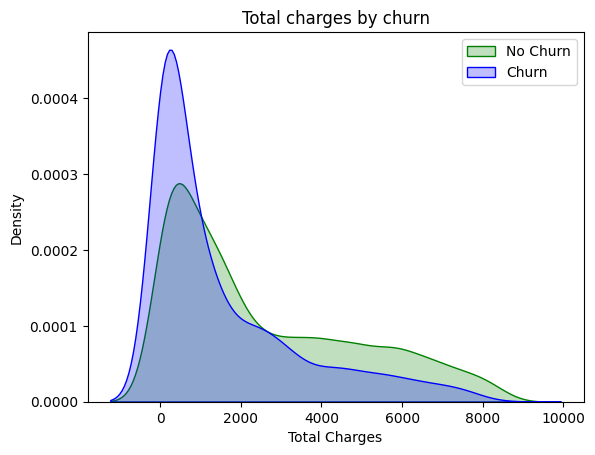

In [36]:
Tot = sns.kdeplot(df2_dummies.TotalCharges[(df2_dummies["Churn"] == 0) ],
                color="Green", fill = True)
Tot = sns.kdeplot(df2.TotalCharges[(df2_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill = True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Churn is higher among customers with lower Total Charges.

We see more people leaving (high churn) when their Total Charges are low.
* At first, this looks strange. But…

* If someone has just joined (short Tenure) and is paying high Monthly Charges, then their Total Charges will be low — because they haven’t stayed long.

So, high churn happens when:
* They’ve been a customer for short time
* They pay high monthly fees
* Their total payment till now is low

All 3 things are connected and lead to higher churn.


6. **Build a corelation of all predictors with 'Churn'**

<Axes: >

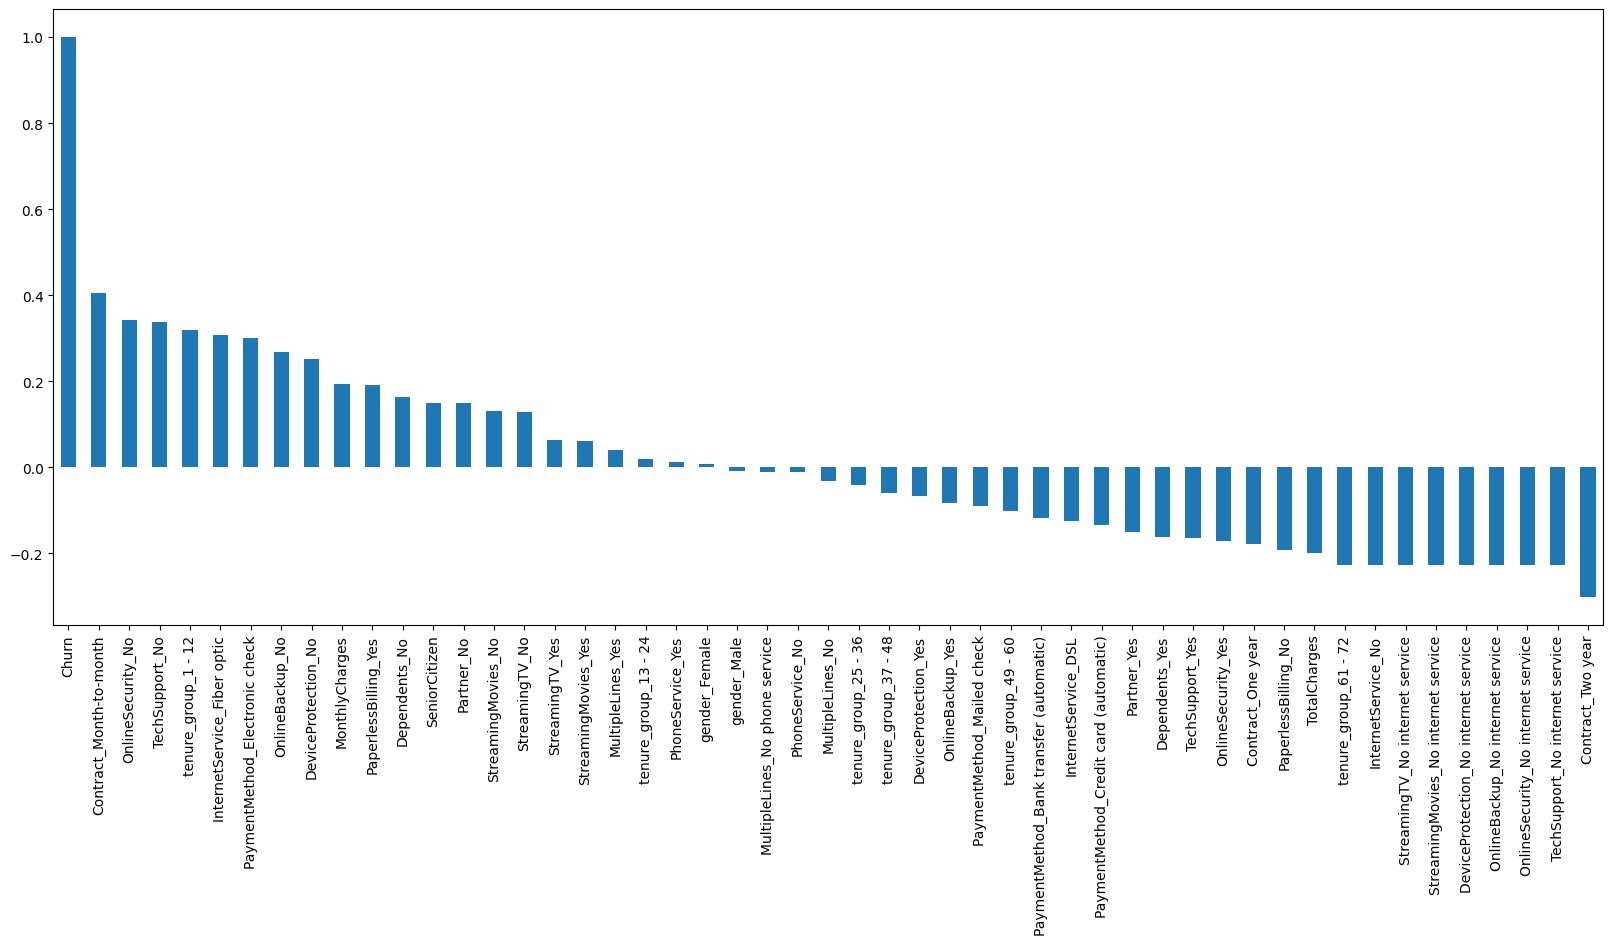

In [37]:
plt.figure(figsize=(20,8))
df2_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **multiple lines** have alomost **NO** impact on Churn


<Axes: >

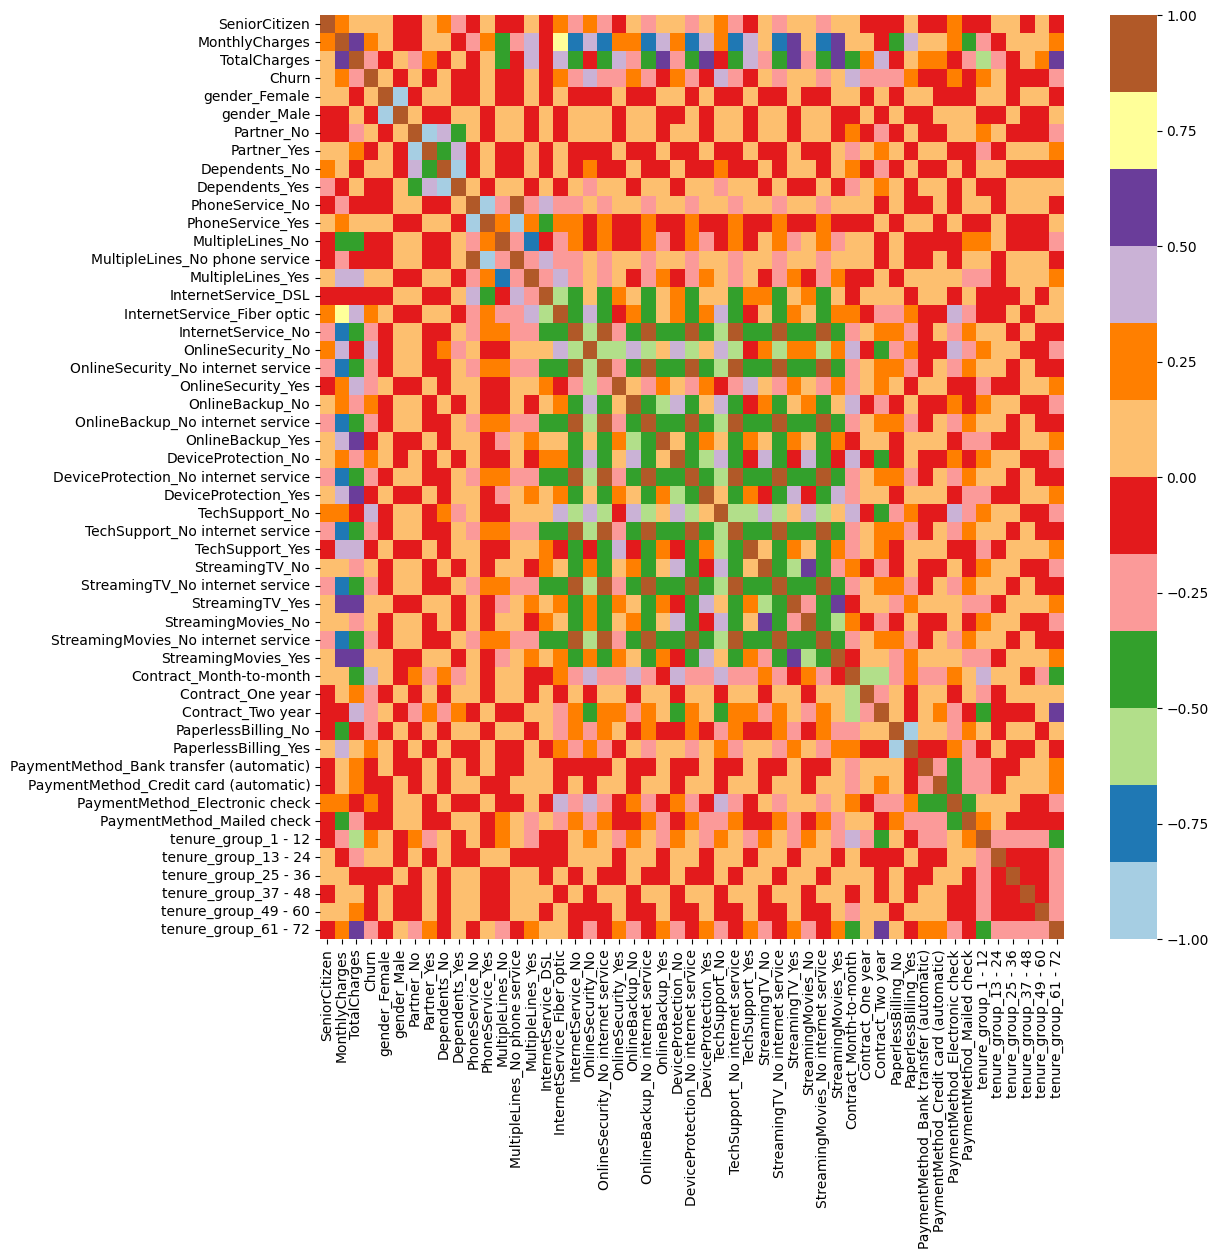

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df2_dummies.corr(), cmap="Paired")

# **Bivariate Analysis**

In [39]:
new_df1_target0=df2.loc[df2["Churn"]==0]
new_df1_target1=df2.loc[df2["Churn"]==1]

In [49]:
def uniplot(df, col, title, hue=None, log_scale=False, figsize=(10, 6)):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)

    if log_scale:
        plt.yscale('log')

    plt.title(title)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', ax=ax)
    plt.show()


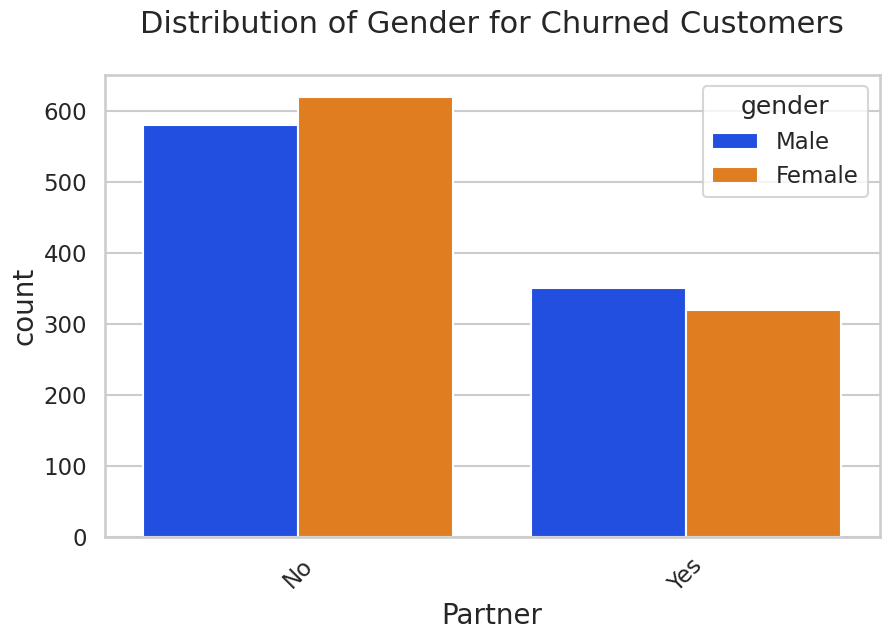

In [51]:
uniplot(new_df1_target1, col='Partner',
        title='Distribution of Gender for Churned Customers',
        hue='gender')      # Fixed size for consistent layout


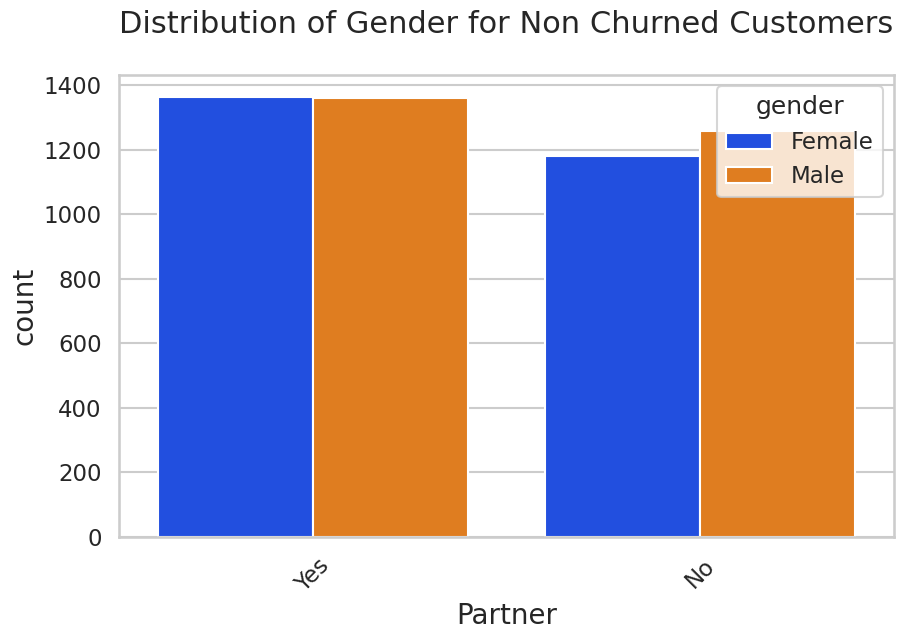

In [52]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

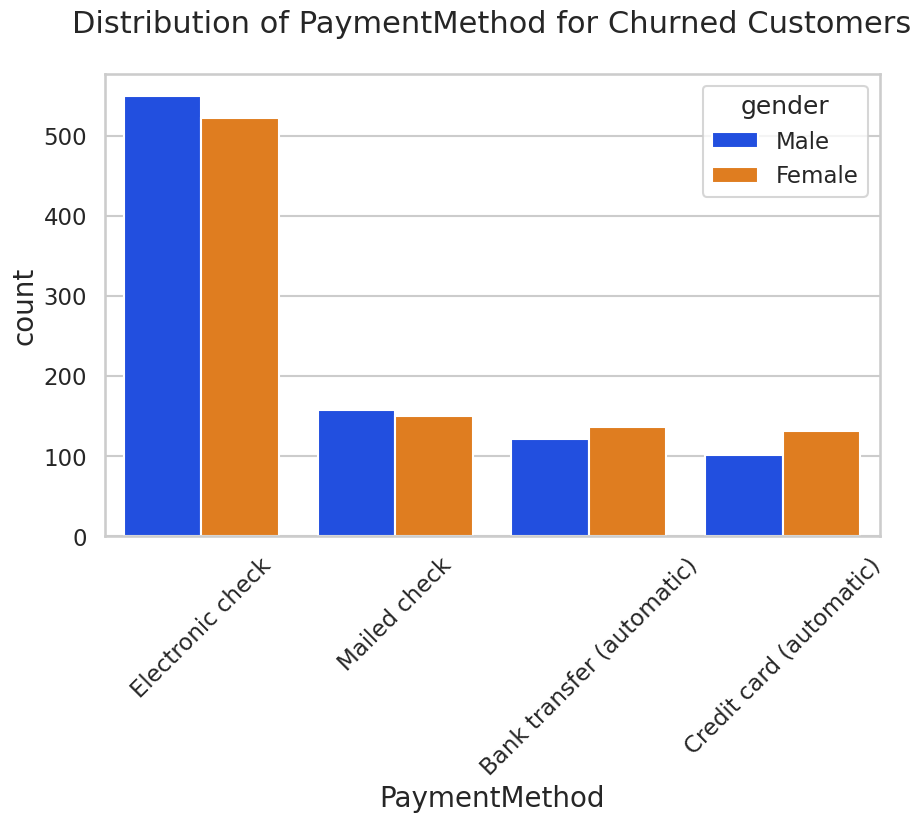

In [53]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

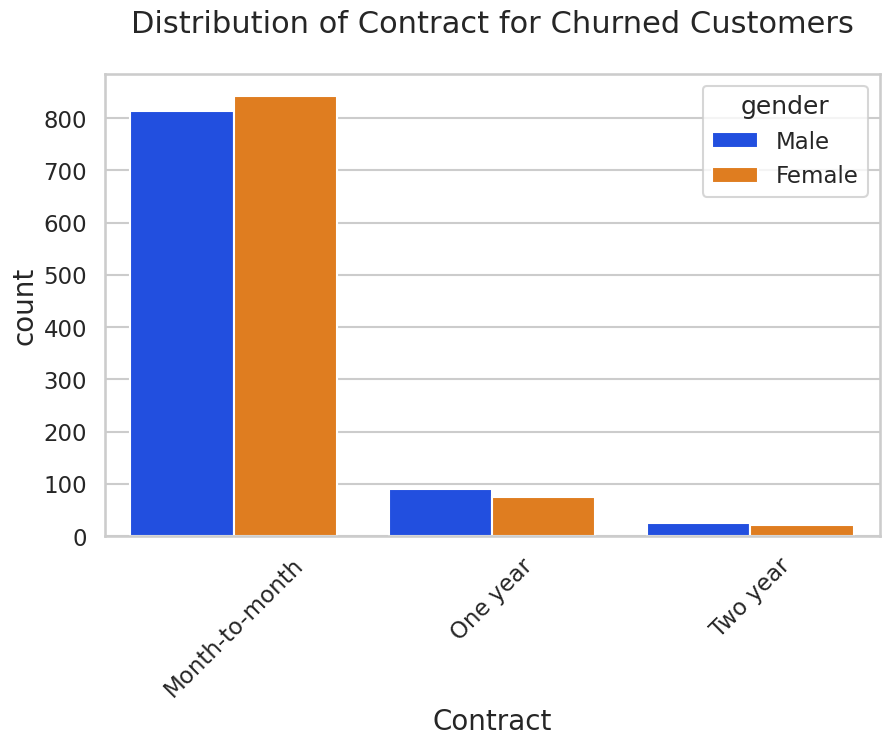

In [54]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

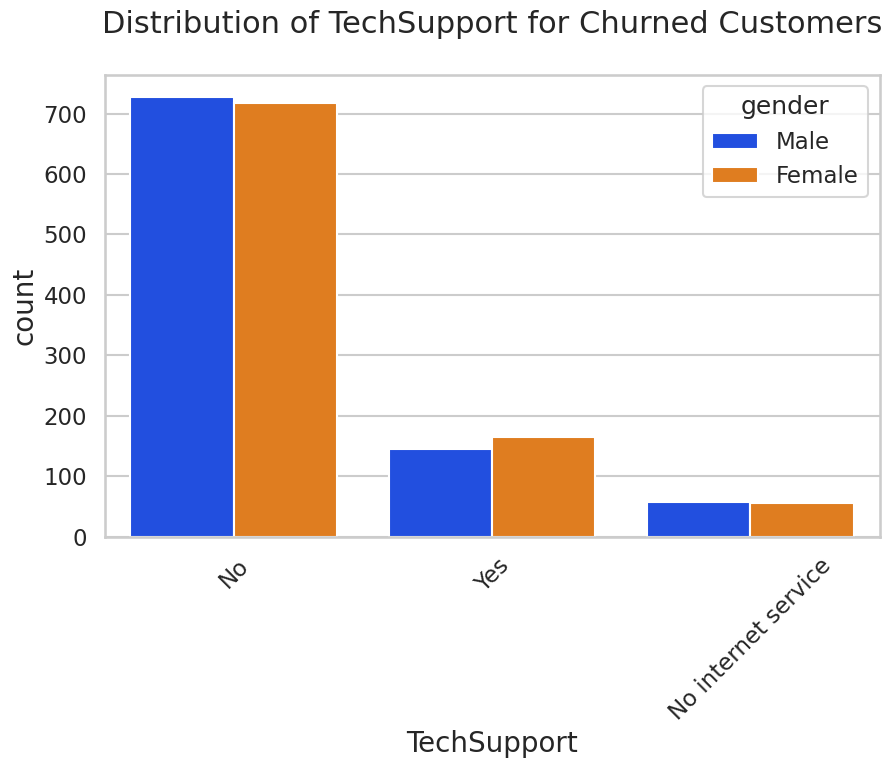

In [55]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

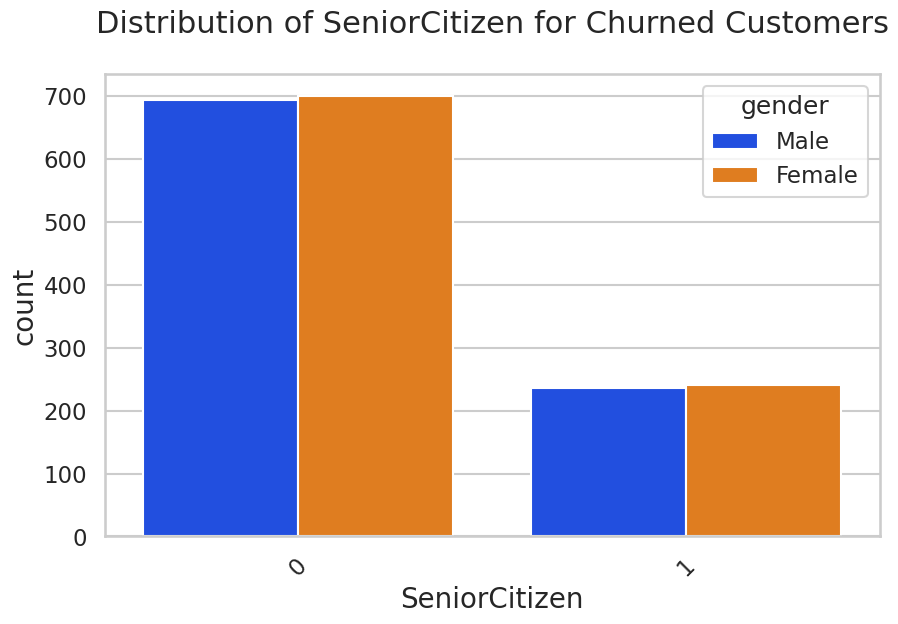

In [56]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# **Conclusion**

*   These are some of the quick insights:

1. Electronic check are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

There could be many more such insights.


In [57]:
df2_dummies.to_csv("chrun.csv")

'Unnamed: 0' Exist?

we saved a DataFrame to CSV using df.to_csv('file.csv') without index=False

Then read it back with pd.read_csv(...), it imports the index column as a normal column

df.to_csv('file.csv', index=False)